# Artificial Intelligence Software Recognizing Istanbul's Districts By Emirhan BULUT - V2.0

**Added to districts:**


> V2.0 - Emirhan BULUT



1.   Halıcıoğlu
2.   Okmeydanı
3.   Ayvansaray


In [1]:
!unzip Emirhan_Data_Set.zip

Archive:  Emirhan_Data_Set.zip
   creating: Data/
   creating: Data/Ayvansaray/
  inflating: Data/Ayvansaray/VID_20220405_170631_000.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_001.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_002.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_003.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_004.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_005.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_006.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_007.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_008.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_009.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_010.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_011.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_012.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_013.jpg  
  inflating: Data/Ayvansaray/VID_20220405_170631_014.jpg  
  inflating: Data/Ayvansaray/VID_20

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.1,
    dtype=None)
train_generator = train_datagen.flow_from_directory("Data/",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    color_mode="grayscale",
                                                    interpolation="nearest",
                                                    subset="training")
test_generator = train_datagen.flow_from_directory("Data/",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    color_mode="grayscale",
                                                    interpolation="nearest",
                                                    subset="validation")

Found 1473 images belonging to 6 classes.
Found 161 images belonging to 6 classes.


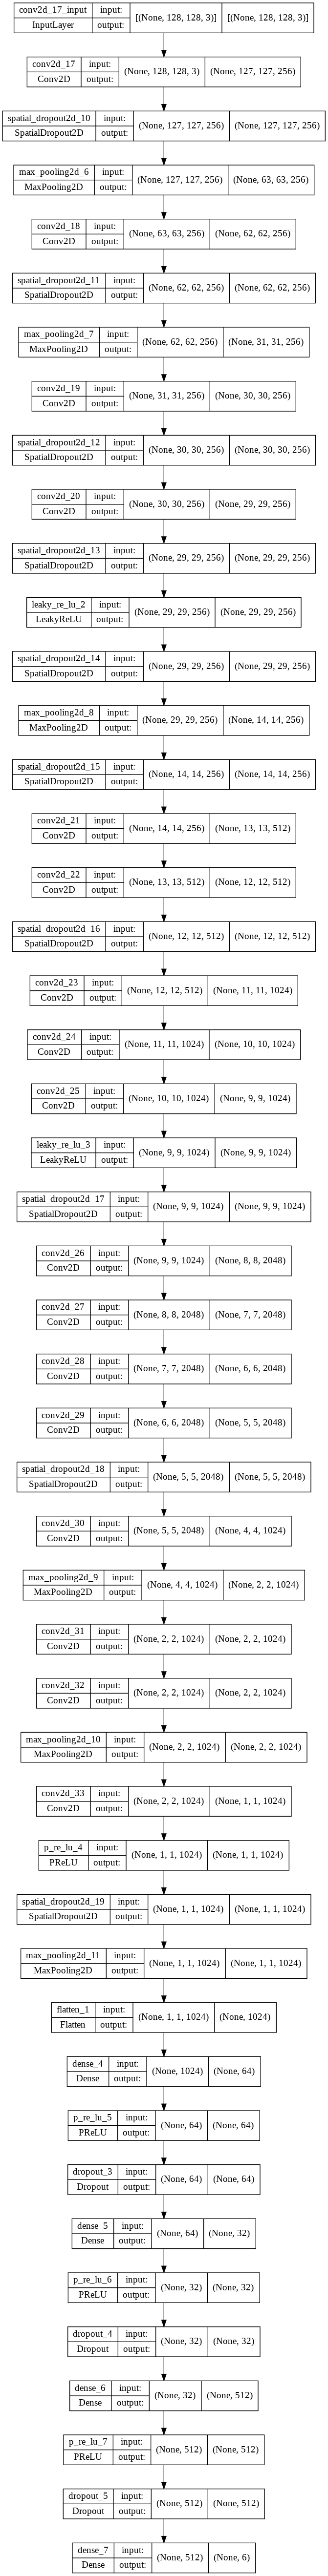

In [2]:
from keras.backend import sigmoid
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
model = Sequential(name="Emirhan_Istanbul_District_Recognition_with_Artificial_Intelligence")

model.add(Conv2D(256,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(256,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(512,2,padding="valid"))
model.add(Conv2D(512,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(Conv2D(1024,2,padding="valid"))
model.add(Conv2D(1024,2,padding="valid"))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(MaxPool2D(2))
model.add(Conv2D(1024,1,padding="valid"))
model.add(Conv2D(1024,1,padding="valid"))
model.add(MaxPool2D(1))
model.add(Conv2D(1024,2,padding="valid"))
model.add(PReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(1))

model.add(Flatten())

model.add(Dense(64))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(6,activation="tanh"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(train_generator,
          validation_data=test_generator,
          batch_size=128,
          validation_batch_size=128,
          epochs=64,
          shuffle=True,
          callbacks=[keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
validation_generator = test_datagen.flow_from_directory("Test/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

In [2]:
from tensorflow.keras.models import load_model
model = load_model("/content/model_53.h5")

In [ ]:
model.evaluate(train_generator)

6/6 [==============================] - 1s 122ms/step - loss: 0.0331 - accuracy: 0.9845


[0.03307473286986351, 0.9845201373100281]

In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 119ms/step - loss: 0.0188 - accuracy: 1.0000


[0.018797287717461586, 1.0]

In [ ]:
model.evaluate(validation_generator)

1/1 [==============================] - 1s 623ms/step - loss: 0.1646 - accuracy: 1.0000


[0.1646277904510498, 1.0]

In [18]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("Test/",target_size=(256, 256),
                                                    batch_size=256,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


# Newly added districts (Okmeydanı, Halıcıoğlu and Ayvansaray)

**Okmeydanı**

In [21]:
prediction(model,predict_generator)

Predicted District is Okmeydanı!


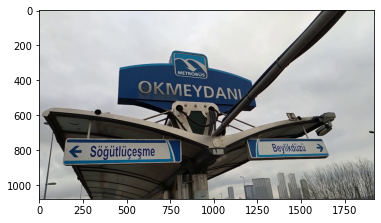

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/Test/test/Okmeydanı.jpg")
plt.imshow(im)
plt.show()

**Ayvansaray**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("Test/",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [7]:
prediction(model,predict_generator)

Predicted District is Ayvansaray!


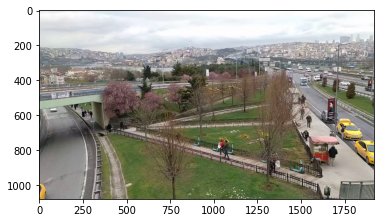

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/Test/test/Ayvansaray.jpg")
plt.imshow(im)
plt.show()

**Halıcıoğlu**

In [9]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("Test/",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [10]:
prediction(model,predict_generator)

Predicted District is Halıcıoğlu!


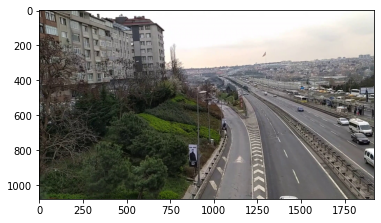

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/Test/test/Halıcıoğlu.jpg")
plt.imshow(im)
plt.show()